In [1]:
#import Statment
import pandas as pd

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

## Dataset
Format:
- each row is an example.
- The last column is the class(GC=1 or Non-GC=0).
- The first 5 columns are features.

In [2]:
# Load Data
SSD1training = pd.read_csv('./data/data1.csv')
SSD2training = pd.read_csv('./data/data2.csv')
SSD3training = pd.read_csv('./data/data3.csv')

SSD1training.head()

,feature1,feature2,feature3,feature4,feature5,Class
0,30,45,70,12,12,0
1,10,45,52,53,25,0
2,50,50,25,274,42,0
3,4,12,254,25,35,1
4,40,15,24,0,25,1


In [3]:
SSD1X=SSD1training.iloc[:,:-1]
SSD1Y=SSD1training["Class"]
SSD2X=SSD2training.iloc[:,:-1]
SSD2Y=SSD2training["Class"]
SSD3X=SSD3training.iloc[:,:-1]
SSD3Y=SSD3training["Class"]

## Construct a decision tree for each SSD

In [8]:
model1 = DecisionTreeClassifier(min_samples_split=2)
model2 = DecisionTreeClassifier(min_samples_split=2)
model3 = DecisionTreeClassifier(min_samples_split=2)

SSD1Tree=model1.fit(SSD1X, SSD1Y)
SSD2Tree=model2.fit(SSD2X, SSD2Y)
SSD3Tree=model3.fit(SSD3X, SSD3Y)
SSD1Tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

SSD1


[Text(167.4, 199.32, 'X[4] <= 23.5\ngini = 0.494\nsamples = 18\nvalue = [10, 8]'),
 Text(111.60000000000001, 163.07999999999998, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(223.20000000000002, 163.07999999999998, 'X[1] <= 51.5\ngini = 0.444\nsamples = 12\nvalue = [4, 8]'),
 Text(167.4, 126.83999999999999, 'X[1] <= 35.0\ngini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(111.60000000000001, 90.6, 'X[0] <= 2.5\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(55.800000000000004, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(167.4, 54.359999999999985, 'X[2] <= 22.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(111.60000000000001, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(223.20000000000002, 18.119999999999976, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(223.20000000000002, 90.6, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(279.0, 126.83999999999999, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

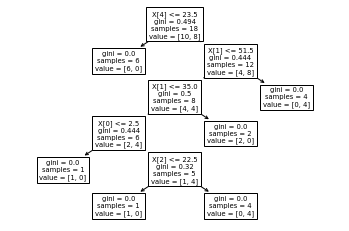

In [5]:
print("SSD1")
tree.plot_tree(SSD1Tree)

## TestData
Format: the output of Iostat

- The first column is the SSD.
- The other columns are the features.

In [6]:
TestData = pd.read_csv('./data/testdata.csv')
TestData

,Unnamed: 0,feature1,feature2,feature3,feature4,feature5
0,sd1,2,8,75,78,8
1,sd2,41,68,8,25,57
2,sd3,2,58,25,55,25


In [7]:
predict={}
predict["sd1"]=SSD1Tree.predict(TestData.iloc[0:1,1:])
predict["sd2"]=SSD2Tree.predict(TestData.iloc[1:2,1:])
predict["sd3"]=SSD3Tree.predict(TestData.iloc[2:3,1:])
predict

{'sd1': array([0], dtype=int64),
 'sd2': array([0], dtype=int64),
 'sd3': array([1], dtype=int64)}